In [1]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,442 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [37]:
import pandas as pd

In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [145]:
# local_file_path : 로컬 파일 경로 
local_file_path = '../data/요일별 교통사고2.xls' 
colab_file_path =  '/content/gdrive/My Drive/빅데이터경진대회/요일별 교통사고2.xls' 
file_path = colab_file_path

df4_raw = pd.read_excel(file_path)
df4_raw

,가해운전자 차량종별 대분류,가해운전자 차량종별,기준년도,2017년,2017년.1,2017년.2,2017년.3,2017년.4,2017년.5,2017년.6,...,2020년.6,2020년.7,2021년,2021년.1,2021년.2,2021년.3,2021년.4,2021년.5,2021년.6,2021년.7
0,가해운전자 차량종별 대분류,가해운전자 차량종별,기준년도,합계,일요일,월요일,화요일,수요일,목요일,금요일,...,금요일,토요일,합계,일요일,월요일,화요일,수요일,목요일,금요일,토요일
1,합계,합계,사고건수,1143175,120388,173364,164674,170471,166043,184116,...,199623,163847,1258704,119991,190919,189342,190395,187717,208774,171566
2,합계,합계,사망자수,4185,523,619,626,581,601,618,...,467,409,2916,347,454,417,416,464,440,378
3,합계,합계,부상자수,1803325,224561,259313,245486,255039,247841,279085,...,322595,303011,2055003,234062,298667,293392,296548,288875,329363,314096
4,합계,승용,사고건수,163058,20383,22796,22634,23535,23337,25513,...,36845,32523,237554,25144,34713,35003,35311,34642,38600,34141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,미분류,합계,부상자수,675542,86375,96126,89872,94230,91001,103485,...,129507,124248,800993,94792,114831,112466,114173,111220,127865,125646
91,미분류,기타,사고건수,397557,41655,60355,56758,59164,57314,64052,...,71344,57840,431680,40882,65599,64647,65278,64418,71763,59093
92,미분류,기타,사망자수,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,미분류,기타,부상자수,675542,86375,96126,89872,94230,91001,103485,...,129507,124248,800993,94792,114831,112466,114173,111220,127865,125646


In [146]:
df4_raw.columns = ["가해운전자 차량종별 대분류",	"가해운전자 차량종별",	"유형",	
                   "Total",	"Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat",
                   "Total",	"Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat",
                   "Total",	"Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat",
                   "Total",	"Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat",
                   "Total",	"Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"] 
df4_raw.iloc[58:61, :11]

,가해운전자 차량종별 대분류,가해운전자 차량종별,유형,Total,Sun,Mon,Tue,Wed,Thu,Fri,Sat
58,개인형이동수단(PM),합계,사고건수,117,11,17,19,18,20,13,19
59,개인형이동수단(PM),합계,사망자수,4,0,1,1,0,1,0,1
60,개인형이동수단(PM),합계,부상자수,124,12,18,21,19,19,14,21


In [130]:
df4_2017 = df4_raw.iloc[58:61, 3:11].reset_index(drop=True).reset_index(drop = True).drop(columns = "Total")
df4_2017

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,11,17,19,18,20,13,19
1,0,1,1,0,1,0,1
2,12,18,21,19,19,14,21


In [128]:
df4_2018 = df4_raw.iloc[58:61, 11:19].reset_index(drop=True).reset_index(drop = True).drop(columns = "Total")
df4_2018

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,24,26,39,40,27,40,29
1,0,1,0,0,1,2,0
2,27,28,40,42,26,41,34


In [129]:
df4_2019 = df4_raw.iloc[58:61, 19:27].reset_index(drop=True).reset_index(drop = True).drop(columns = "Total")
df4_2019

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,47,76,78,62,62,66,56
1,2,0,2,0,1,2,1
2,47,84,81,67,68,68,58


In [131]:
df4_2020 = df4_raw.iloc[58:61, 27:35].reset_index(drop=True).reset_index(drop = True).drop(columns = "Total")
df4_2020

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,88,118,140,161,127,132,131
1,1,4,0,0,2,1,2
2,100,121,157,183,138,144,142


In [132]:
df4_2021 = df4_raw.iloc[58:61, 35:43].reset_index(drop=True).reset_index(drop = True).drop(columns = "Total")
df4_2021

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,235,242,219,249,285,277,228
1,6,5,2,1,5,0,0
2,260,260,241,267,314,306,253


In [133]:
df_2017_acci = df4_2017.iloc[0:1,:]
df_2018_acci = df4_2018.iloc[0:1,:]
df_2019_acci = df4_2019.iloc[0:1,:]
df_2020_acci = df4_2020.iloc[0:1,:]
df_2021_acci = df4_2021.iloc[0:1,:]

list_2017_acci = df_2017_acci.values.tolist()[0]
list_2018_acci = df_2018_acci.values.tolist()[0]
list_2019_acci = df_2019_acci.values.tolist()[0]
list_2020_acci = df_2020_acci.values.tolist()[0]
list_2021_acci = df_2021_acci.values.tolist()[0]

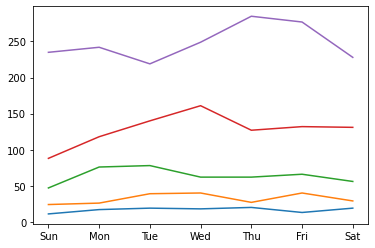

In [139]:
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2017_acci)
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2018_acci)
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2019_acci)
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2020_acci)
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2021_acci)
plt.show()

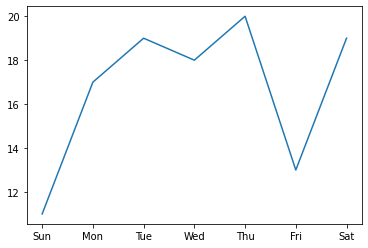

In [140]:
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2017_acci)

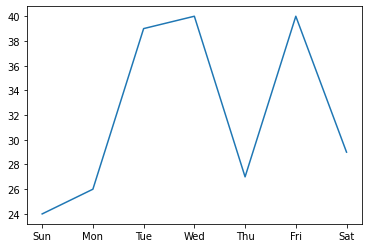

In [141]:
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2018_acci)

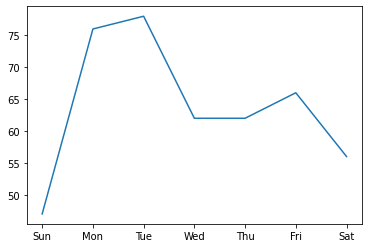

In [142]:
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2019_acci)

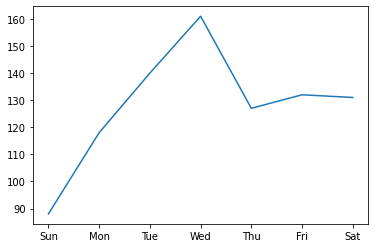

In [143]:
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2020_acci)

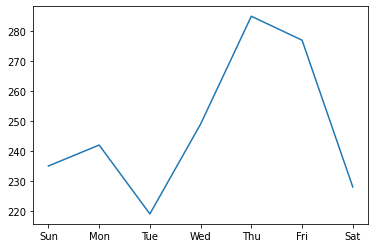

In [144]:
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2021_acci)

In [149]:
#교통사고 총합
df4_raw.columns = ["가해운전자 차량종별 대분류",	"가해운전자 차량종별",	"유형",	
                   "Total",	"Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat",
                   "Total",	"Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat",
                   "Total",	"Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat",
                   "Total",	"Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat",
                   "Total",	"Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"] 
df4_raw.iloc[1:4, :11]

,가해운전자 차량종별 대분류,가해운전자 차량종별,유형,Total,Sun,Mon,Tue,Wed,Thu,Fri,Sat
1,합계,합계,사고건수,1143175,120388,173364,164674,170471,166043,184116,164119
2,합계,합계,사망자수,4185,523,619,626,581,601,618,617
3,합계,합계,부상자수,1803325,224561,259313,245486,255039,247841,279085,292000


In [151]:
df_2017 = df4_raw.iloc[1:4, 3:11].reset_index(drop=True).reset_index(drop = True).drop(columns = "Total")
df_2017

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,120388,173364,164674,170471,166043,184116,164119
1,523,619,626,581,601,618,617
2,224561,259313,245486,255039,247841,279085,292000


In [150]:
df_2018 = df4_raw.iloc[1:4, 11:19].reset_index(drop=True).reset_index(drop = True).drop(columns = "Total")
df_2018

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,120372,192116,179216,182319,181643,198783,173680
1,458,535,552,546,540,581,569
2,223673,290038,269133,272648,269854,300987,308675


In [156]:
df_2019 = df4_raw.iloc[1:4, 19:27].reset_index(drop=True).reset_index(drop = True).drop(columns = "Total")
df_2019

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,130174,198286,196213,192000,184995,212053,179143
1,361,540,479,493,503,528,445
2,244872,296308,296274,288851,278983,326288,322395


In [157]:
df_2020 = df4_raw.iloc[1:4, 27:35].reset_index(drop=True).reset_index(drop = True).drop(columns = "Total")
df_2020

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,116613,197816,189555,191395,188774,199623,163847
1,387,457,443,492,426,467,409
2,226805,311198,297459,300963,299757,322595,303011


In [158]:
df_2021 = df4_raw.iloc[1:4, 35:43].reset_index(drop=True).reset_index(drop = True).drop(columns = "Total")
df_2021

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,119991,190919,189342,190395,187717,208774,171566
1,347,454,417,416,464,440,378
2,234062,298667,293392,296548,288875,329363,314096


In [159]:
df_2017_acc = df_2017.iloc[0:1,:]
df_2018_acc = df_2018.iloc[0:1,:]
df_2019_acc = df_2019.iloc[0:1,:]
df_2020_acc = df_2020.iloc[0:1,:]
df_2021_acc = df_2021.iloc[0:1,:]

list_2017_acc = df_2017_acc.values.tolist()[0]
list_2018_acc = df_2018_acc.values.tolist()[0]
list_2019_acc = df_2019_acc.values.tolist()[0]
list_2020_acc = df_2020_acc.values.tolist()[0]
list_2021_acc = df_2021_acc.values.tolist()[0]

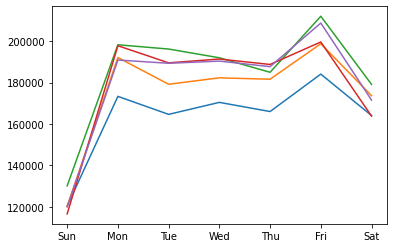

In [161]:
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2017_acc)
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2018_acc)
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2019_acc)
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2020_acc)
plt.plot(["Sun",	"Mon",	"Tue",	"Wed",	"Thu",	"Fri",	"Sat"],list_2021_acc)
plt.show()